In [2]:
import xarray as xr
import numpy as np

from scipy import signal
import scipy.ndimage as im

import matplotlib.pyplot as plt

from sympy import Symbol, pi, atan, factor, lambdify

import sstats.hfreq as hf
import sstats.tseries as ts
import sstats.sigp as sigp
from sstats import get_cmap_colors
#import mitequinox.sigp as sp

rad = 2*np.pi

print_figs = True

In [3]:
#Load data
path = '/Users/zcaspar/codes/mit4320/'
ds1 = xr.open_dataset(path+'synthetic_1.nc') 
ds30 = xr.open_dataset(path+'synthetic_30.nc')
ds78 = xr.open_dataset(path+'synthetic_78.nc')

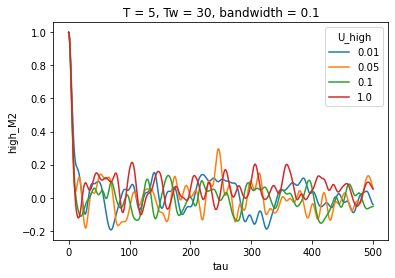

<Figure size 432x288 with 0 Axes>

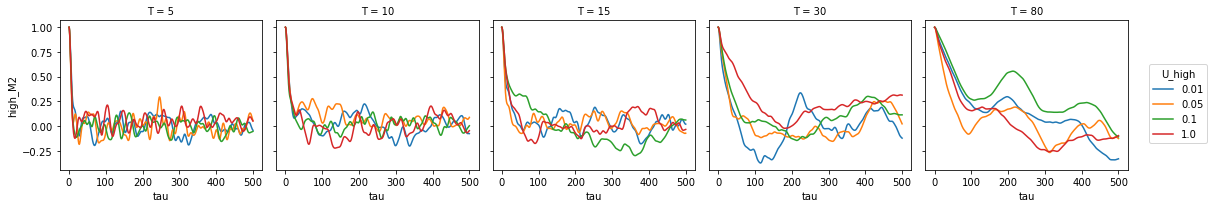

<Figure size 432x288 with 0 Axes>

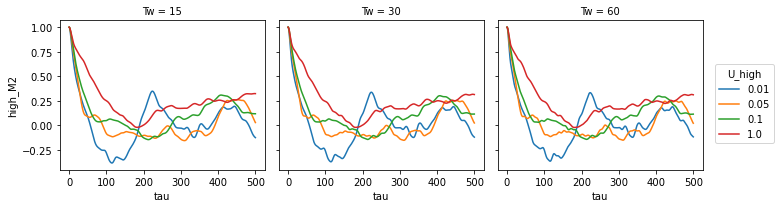

<Figure size 432x288 with 0 Axes>

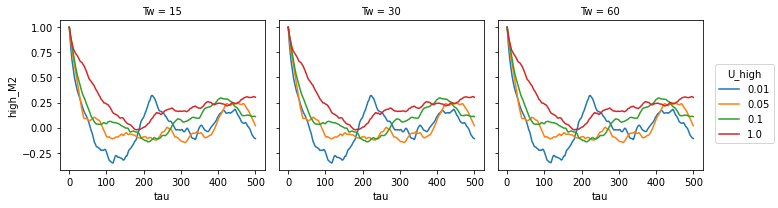

<Figure size 432x288 with 0 Axes>

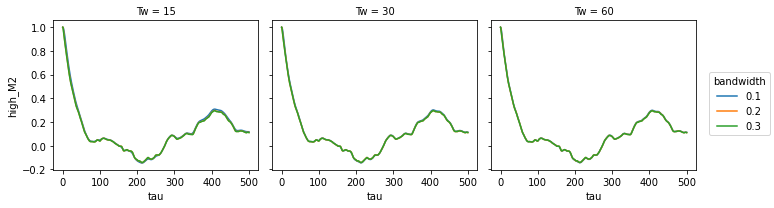

In [5]:
(ds1.high_M2/ds1.high_M2.isel(tau=0)).sel(bandwidth=0.1,T=5,Tw=30).plot(hue='U_high')
plt.figure()
(ds1.high_M2/ds1.high_M2.isel(tau=0)).sel(bandwidth=0.1,Tw=30).plot(hue='U_high',col='T')

plt.figure()
(ds1.high_M2/ds1.high_M2.isel(tau=0)).sel(bandwidth=0.1,T=30).plot(hue='U_high',col='Tw')

plt.figure()
(ds1.high_M2/ds1.high_M2.isel(tau=0)).sel(bandwidth=0.3,T=30).plot(hue='U_high',col='Tw')

plt.figure()
(ds1.high_M2/ds1.high_M2.isel(tau=0)).sel(T=30,U_high=0.1).plot(hue='bandwidth',col='Tw')

Notes : 

For large enough bandwidth compared to the decorrelation timescale, kernel length and bandwidth do not have impact on the results.

The form of autocovariance changes depending on the amplitude (mean over several samples should correct this).

NB : Short decorrealtion timescale compared to the band width ($\tilde T\leq T_\omega$) introduces oscillations in the autocovariance (expected)

<Figure size 432x288 with 0 Axes>

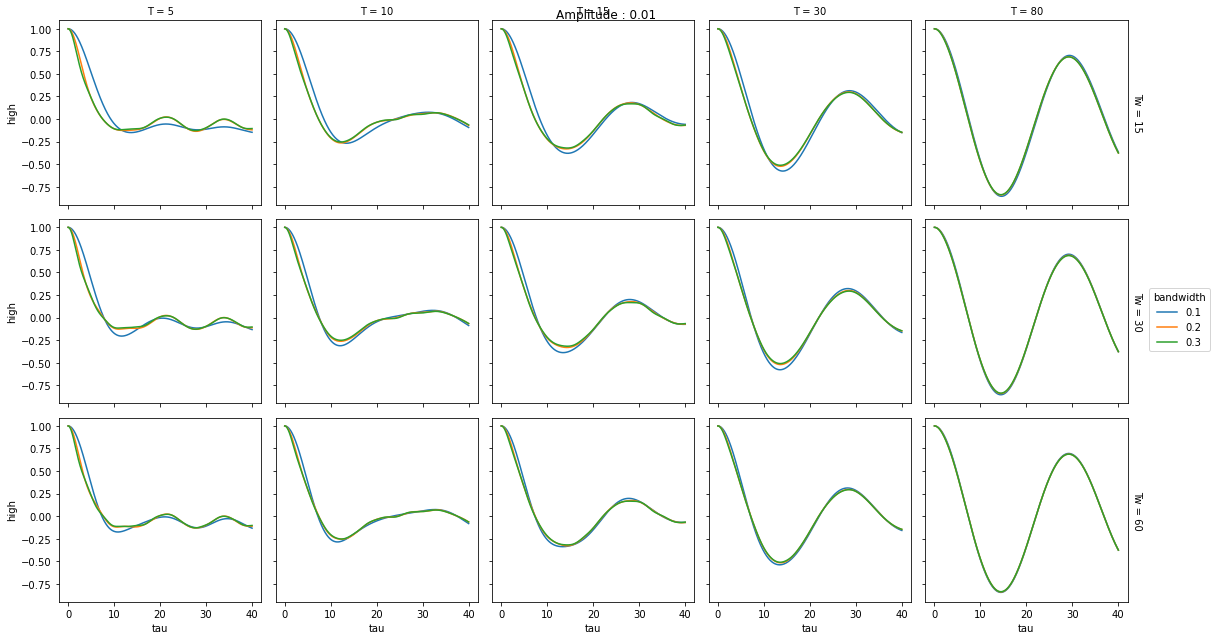

<Figure size 432x288 with 0 Axes>

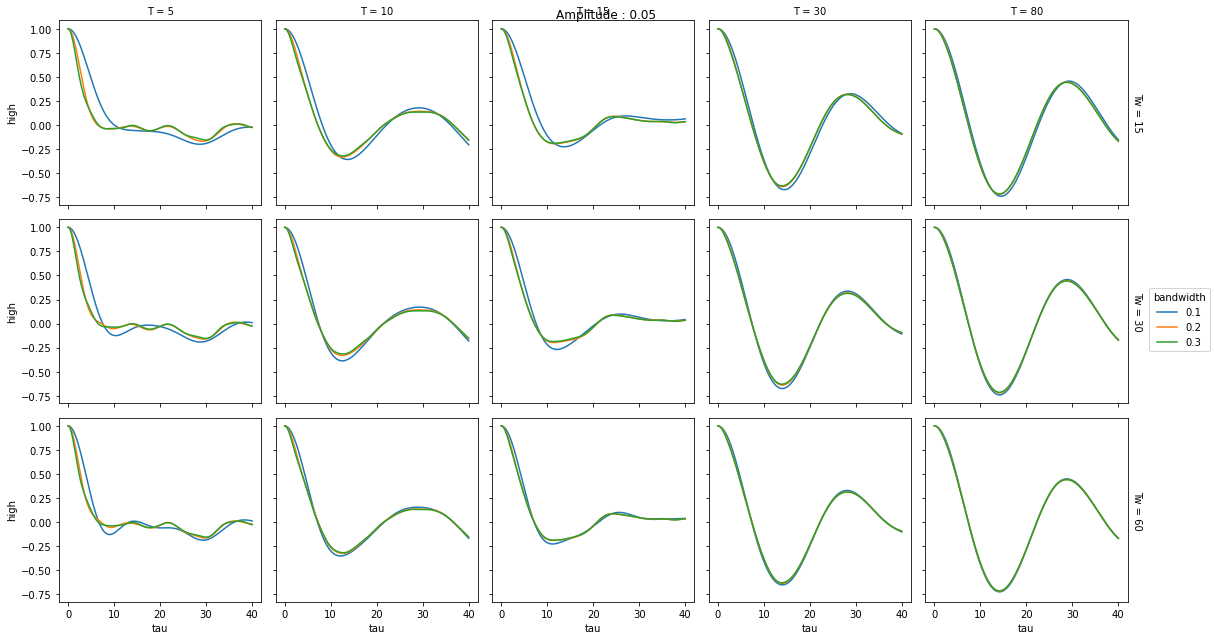

<Figure size 432x288 with 0 Axes>

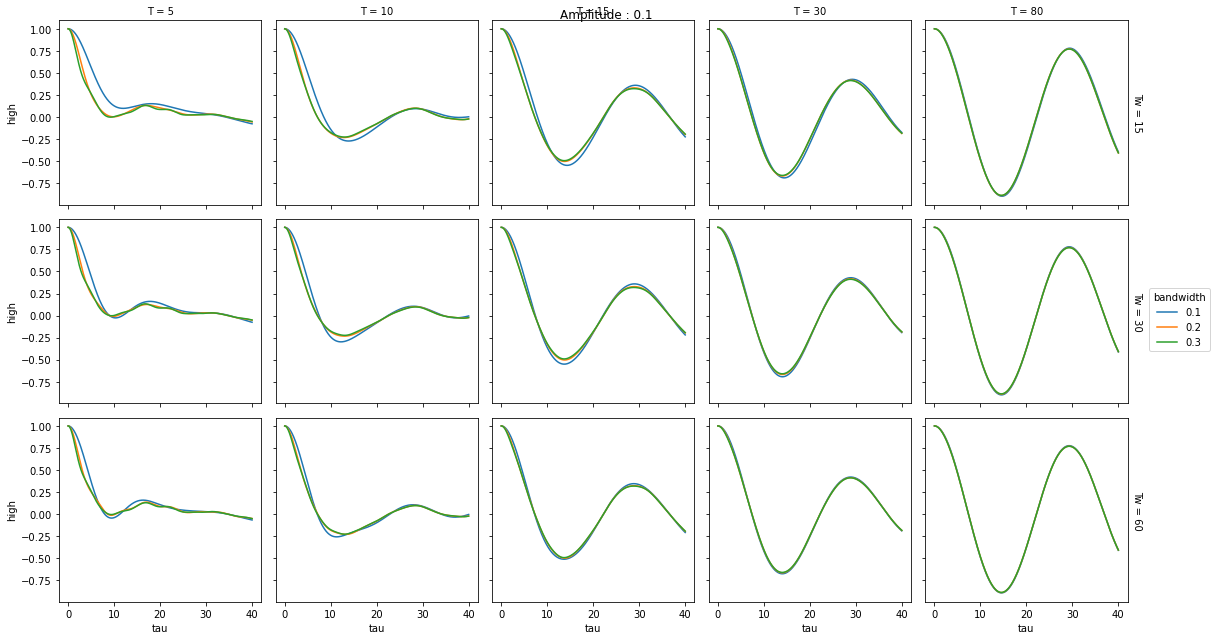

<Figure size 432x288 with 0 Axes>

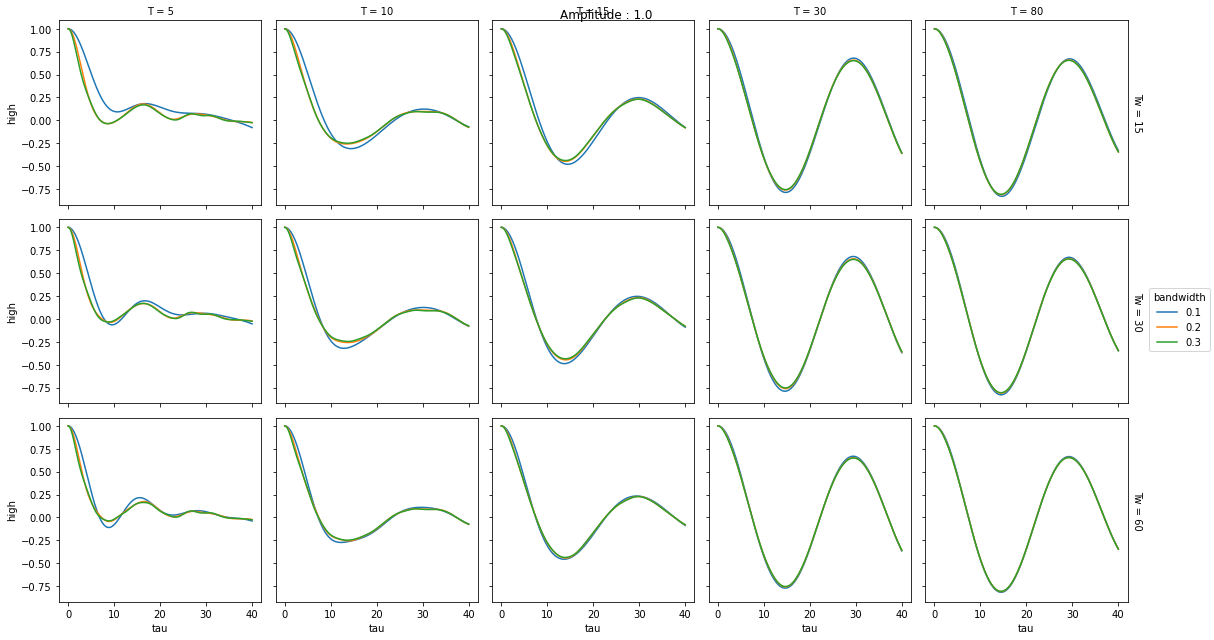

In [7]:
for U in ds1.U_high:
    fig = plt.figure()
    (ds1.high/ds1.high.isel(tau=0)).sel(U_high=U).sel(tau=slice(0,40)).plot(hue='bandwidth',col='T',row='Tw')
    plt.suptitle('Amplitude : '+str(U.values));fig.tight_layout()
    

Notes : 

Larger kernel size decreases the dependence to the bandwidth at fixed decorrelation timescale.

For decorrelation timescale of 5 days, the spring neap cycle is not captured anymore (osclliations at shorter period appears).

Form for decorrelation timescales changes depending on the amplitude (stronger for T=5days).

NB : Here one possible explaination for oscillations of period shorter than spring neap cycle is decorrelation timescale too small compared to the cycle, no significant impact of bandwidth, etc in the observed cases (we did not test very small kernel size that could introduce new problems).

Comparison to monochromatic signal : 

The oscillations observed for $\tilde T\leq T_\omega$ observed in the monochromatic case are not observed anymore. The fact that the decorrelation timescale is shorter than the spring neap cycle seems to have a dominiant effect and creates oscillations even in cases of large enough bandwidth ($\tilde T \geq T_\omega$)

<Figure size 432x288 with 0 Axes>

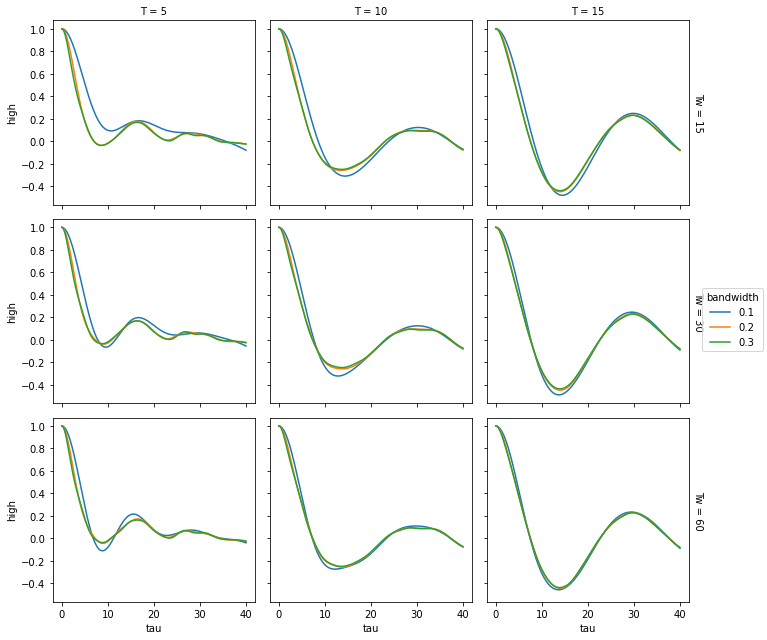

In [10]:
fig = plt.figure()
(ds1.high/ds1.high.isel(tau=0)).sel(U_high=1.).sel(tau=slice(0,40),T=slice(5,15)).plot(hue='bandwidth',col='T',row='Tw')
fig.tight_layout()
    

<Figure size 432x288 with 0 Axes>

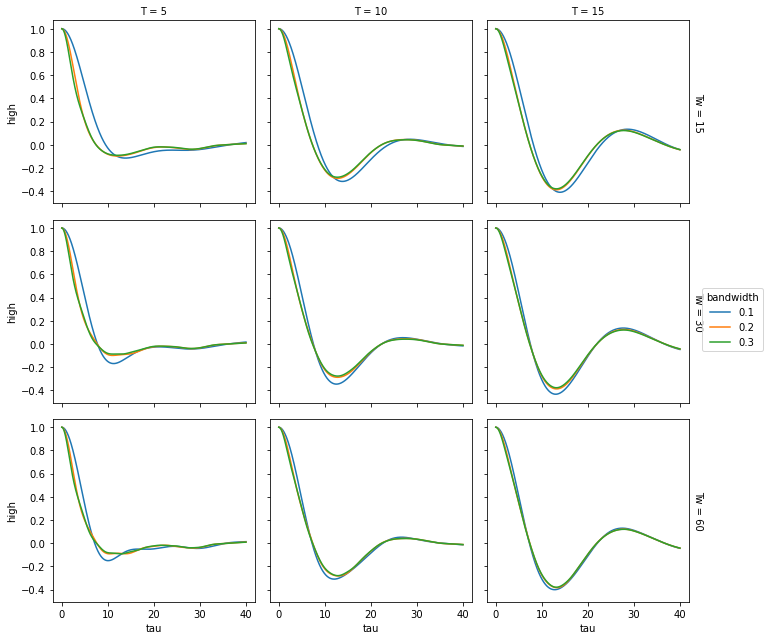

In [14]:
fig = plt.figure()
(ds30.high/ds30.high.isel(tau=0)).sel(U_high=1.,T_low=15).sel(tau=slice(0,40),T=slice(5,15)).plot(hue='bandwidth',col='T',row='Tw')
fig.tight_layout()

<Figure size 432x288 with 0 Axes>

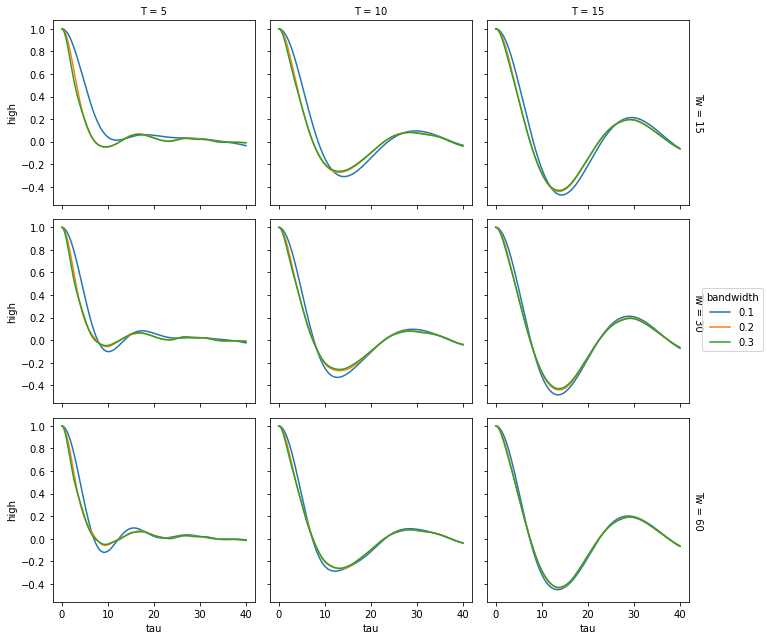

In [15]:
fig = plt.figure()
(ds78.high/ds78.high.isel(tau=0)).sel(U_high=1.,T_low=15).sel(tau=slice(0,40),T=slice(5,15)).plot(hue='bandwidth',col='T',row='Tw')
fig.tight_layout()

Notes : 

Less "small" oscillations for T=5 (a bit more for smallest bandwidth)

<Figure size 432x288 with 0 Axes>

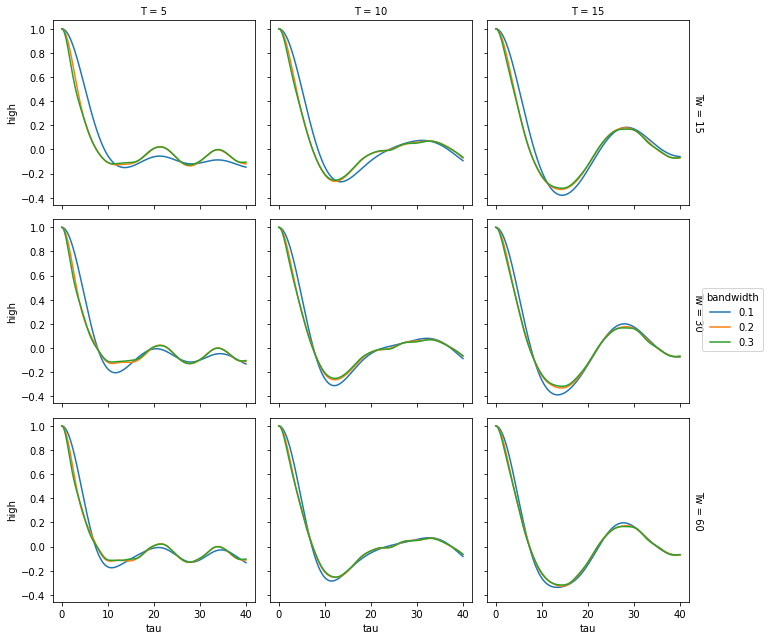

<Figure size 432x288 with 0 Axes>

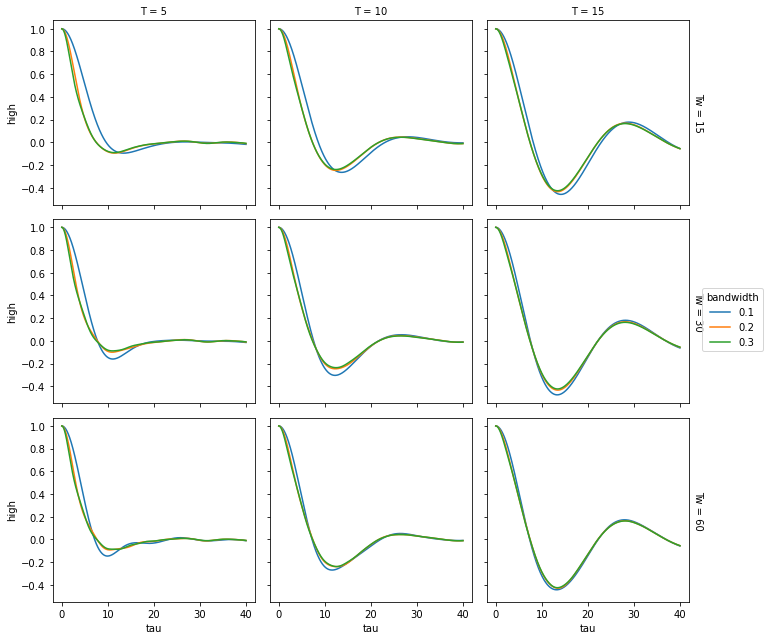

<Figure size 432x288 with 0 Axes>

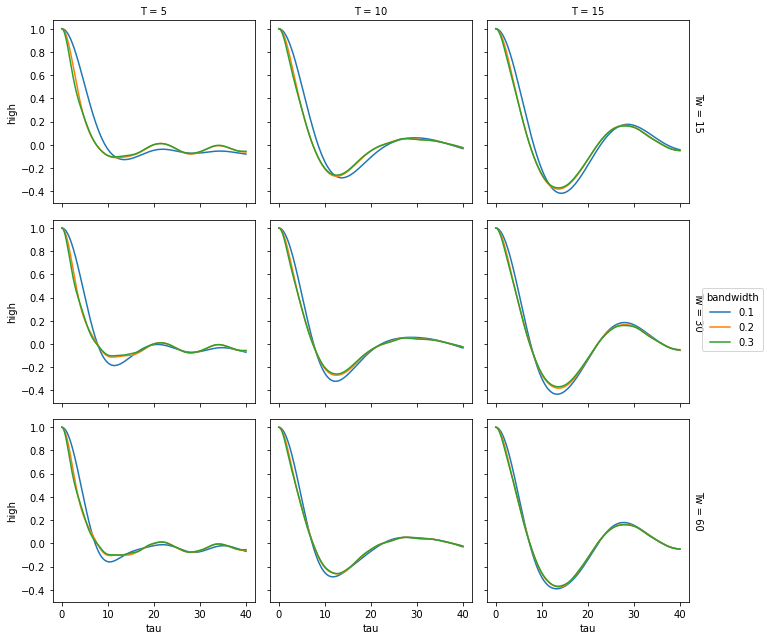

In [51]:
fig = plt.figure()
(ds1.high/ds1.high.isel(tau=0)).sel(U_high=.01).sel(tau=slice(0,40),T=slice(5,15)).plot(hue='bandwidth',col='T',row='Tw')
fig.tight_layout()
fig = plt.figure()
(ds30.high/ds30.high.isel(tau=0)).sel(U_high=.01,T_low=5).sel(tau=slice(0,40),T=slice(5,15)).plot(hue='bandwidth',col='T',row='Tw')
fig.tight_layout()
fig = plt.figure()
(ds78.high/ds78.high.isel(tau=0)).sel(U_high=.01,T_low=5).sel(tau=slice(0,40),T=slice(5,15)).plot(hue='bandwidth',col='T',row='Tw')
fig.tight_layout()

#### Estimation timescales:

In [55]:
T1_high = ((ds1.high/ds1.high.sel(tau=0))**2).sel(tau=slice(0,30)).sum('tau')
T30_high = ((ds30.high/ds30.high.sel(tau=0))**2).sel(tau=slice(0,30)).sum('tau')
T78_high  = ((ds78.high/ds78.high.sel(tau=0))**2).sel(tau=slice(0,30)).sum('tau')


T1 = ((ds1.total/ds1.total.sel(tau=0))**2).sel(tau=slice(0,30)).sum('tau')
T30 = ((ds30.total/ds30.total.sel(tau=0))**2).sel(tau=slice(0,30)).sum('tau')
T78  = ((ds78.total/ds78.total.sel(tau=0))**2).sel(tau=slice(0,30)).sum('tau')

In [56]:
Tt_high = xr.Dataset({'T1':T1_high,'T30':T30_high,'T78':T78_high})

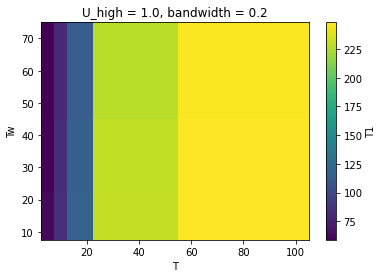

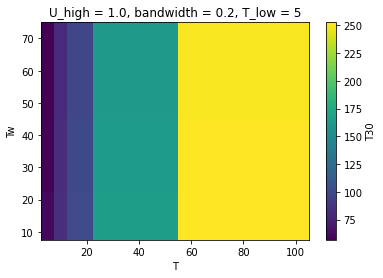

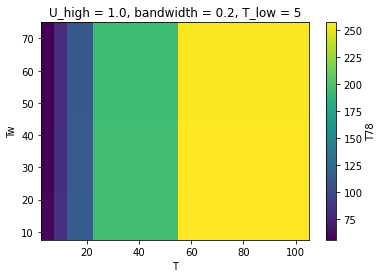

In [59]:
Tt_high.T1.sel(U_high=1.,bandwidth=0.2).plot()
plt.figure()
Tt_high.T30.sel(U_high=1.,bandwidth=0.2,T_low=5).plot()
plt.figure()
Tt_high.T78.sel(U_high=1.,bandwidth=0.2,T_low=5).plot()

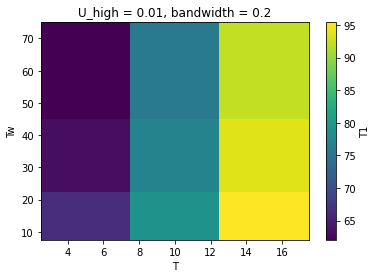

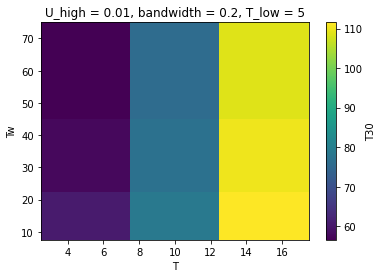

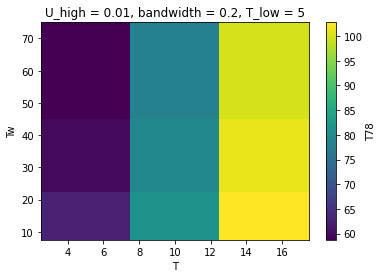

In [62]:
Tt_high.T1.sel(U_high=.01,bandwidth=0.2).sel(T=slice(5,15)).plot()
plt.figure()
Tt_high.T30.sel(U_high=.01,bandwidth=0.2,T_low=5).sel(T=slice(5,15)).plot()
plt.figure()
Tt_high.T78.sel(U_high=.01,bandwidth=0.2,T_low=5).sel(T=slice(5,15)).plot()

Notes : 

ça marche très très peu...

### Total signal : 

<Figure size 432x288 with 0 Axes>

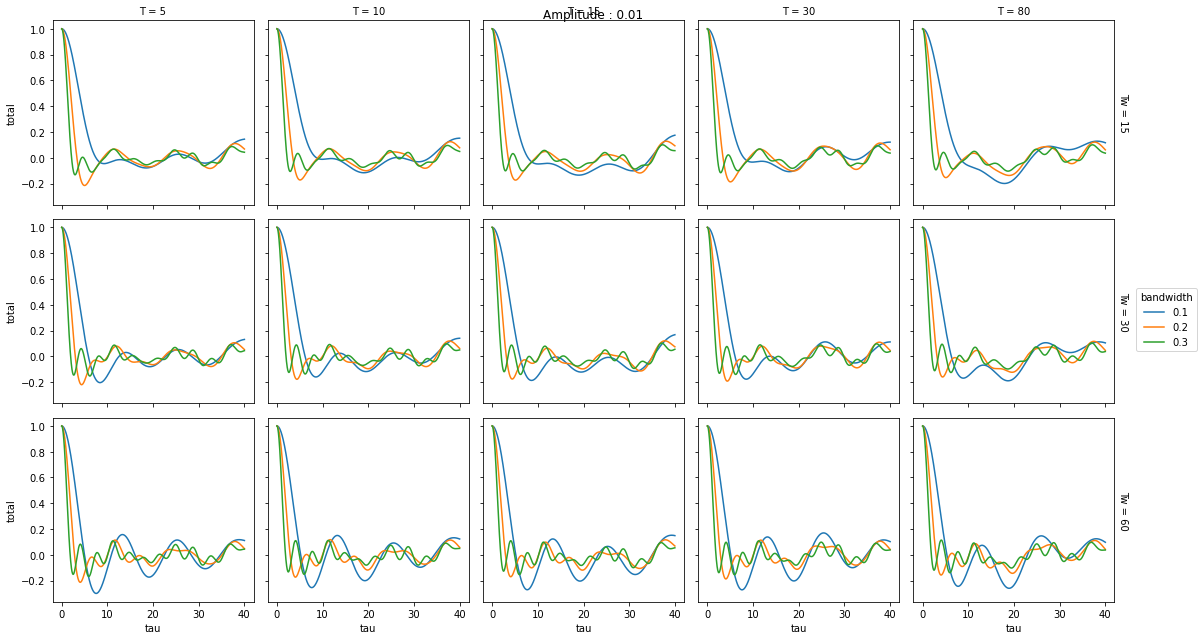

<Figure size 432x288 with 0 Axes>

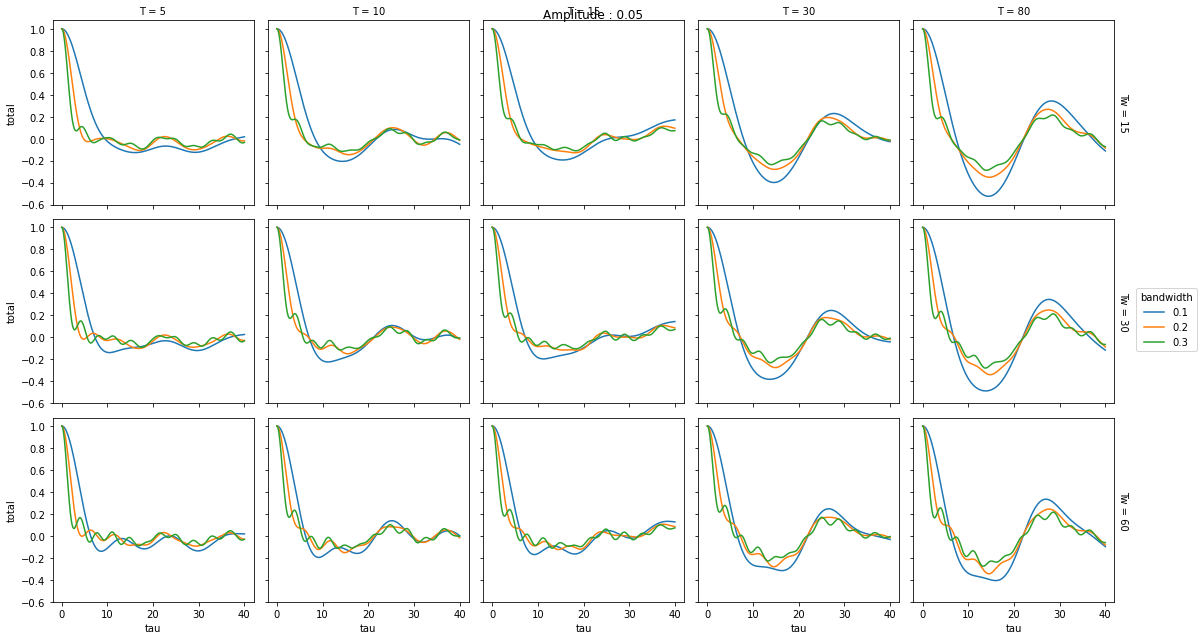

<Figure size 432x288 with 0 Axes>

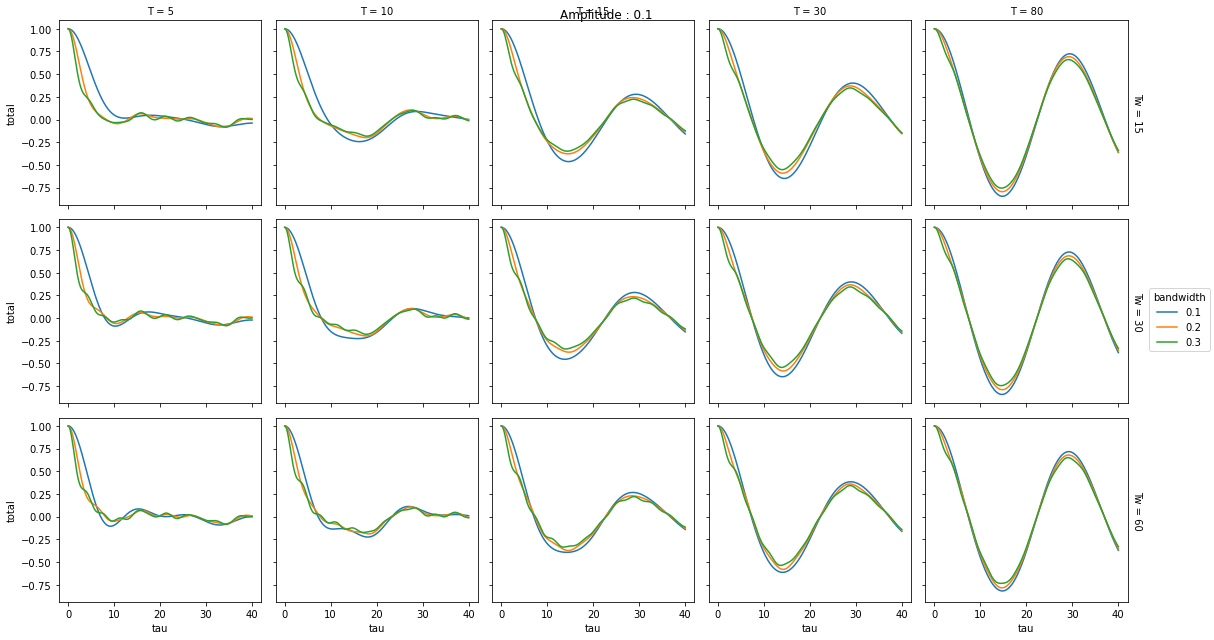

<Figure size 432x288 with 0 Axes>

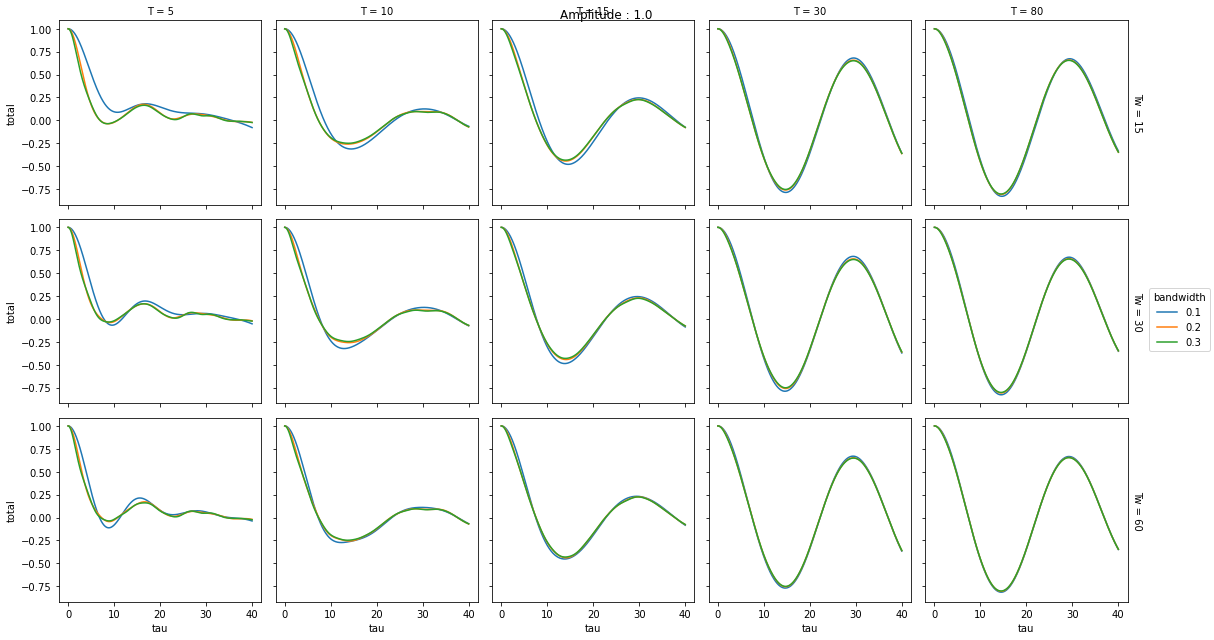

In [64]:
for U in ds1.U_high:
    fig = plt.figure()
    (ds1.total/ds1.total.isel(tau=0)).sel(U_high=U,T_low=5).sel(tau=slice(0,40)).plot(hue='bandwidth',col='T',row='Tw')
    plt.suptitle('Amplitude : '+str(U.values));fig.tight_layout()

<Figure size 432x288 with 0 Axes>

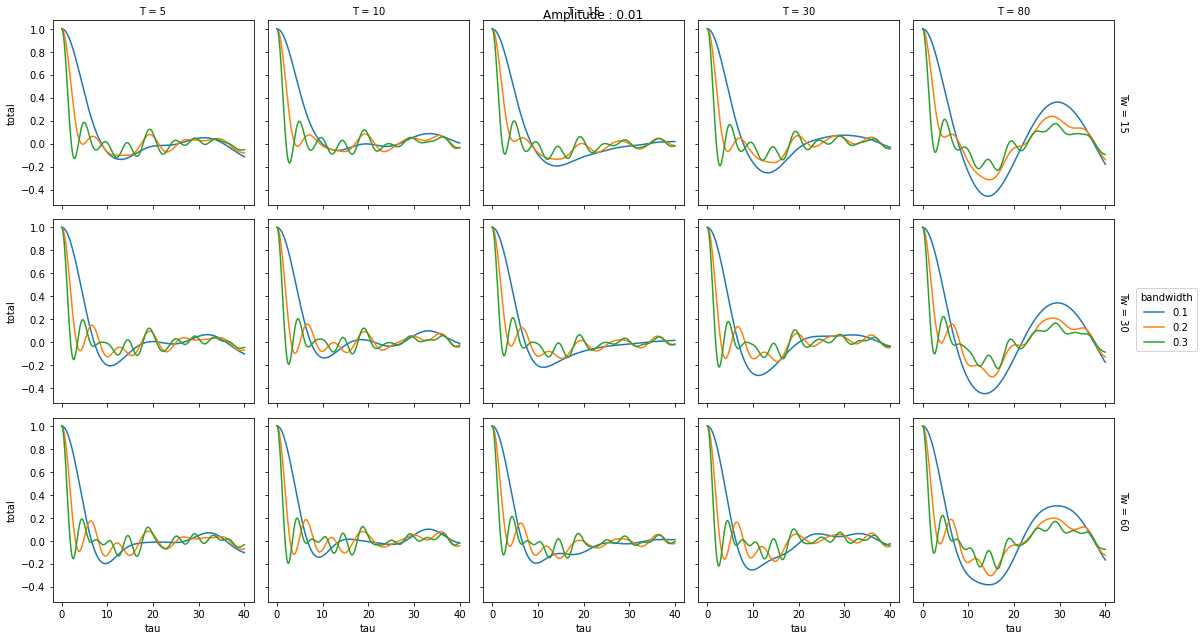

<Figure size 432x288 with 0 Axes>

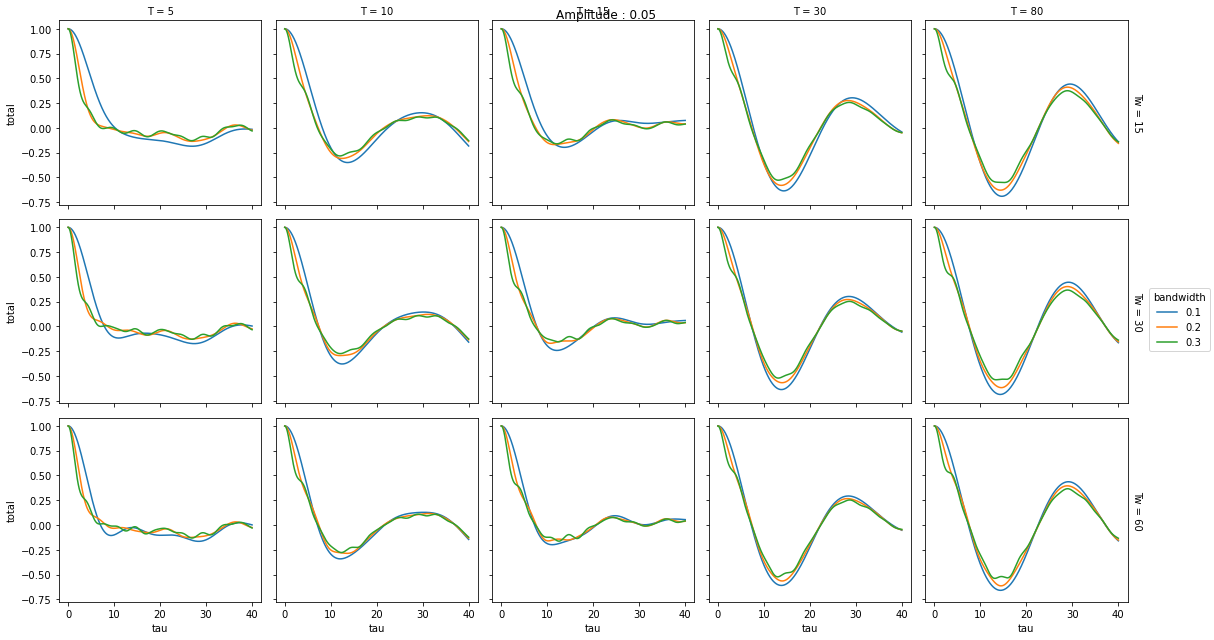

<Figure size 432x288 with 0 Axes>

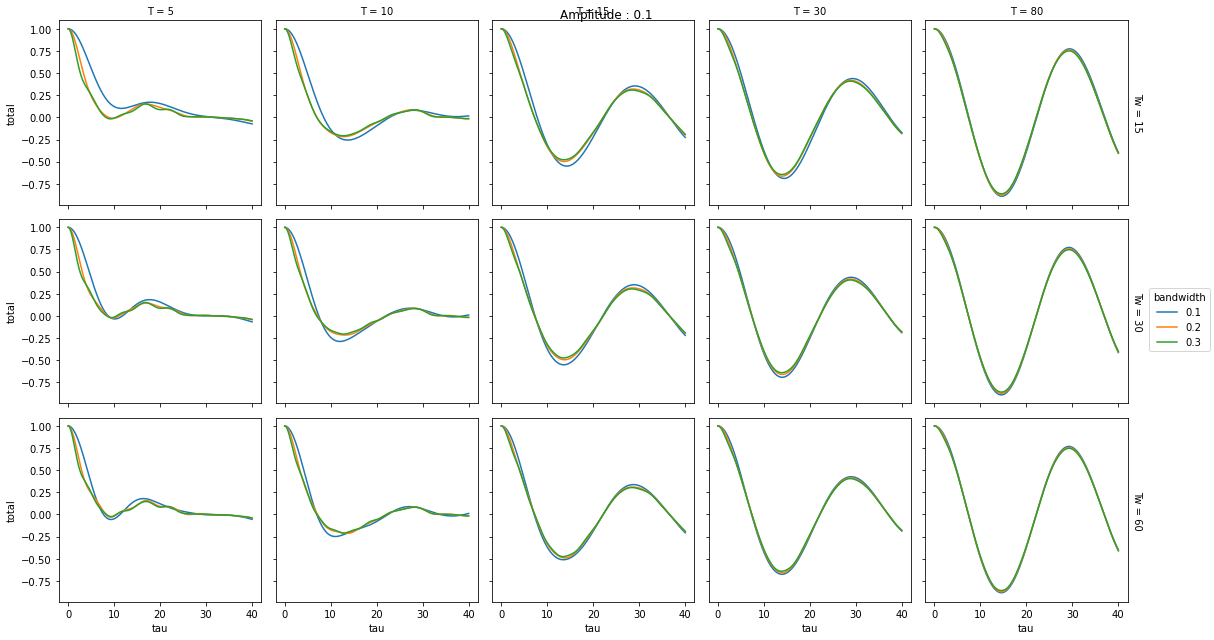

<Figure size 432x288 with 0 Axes>

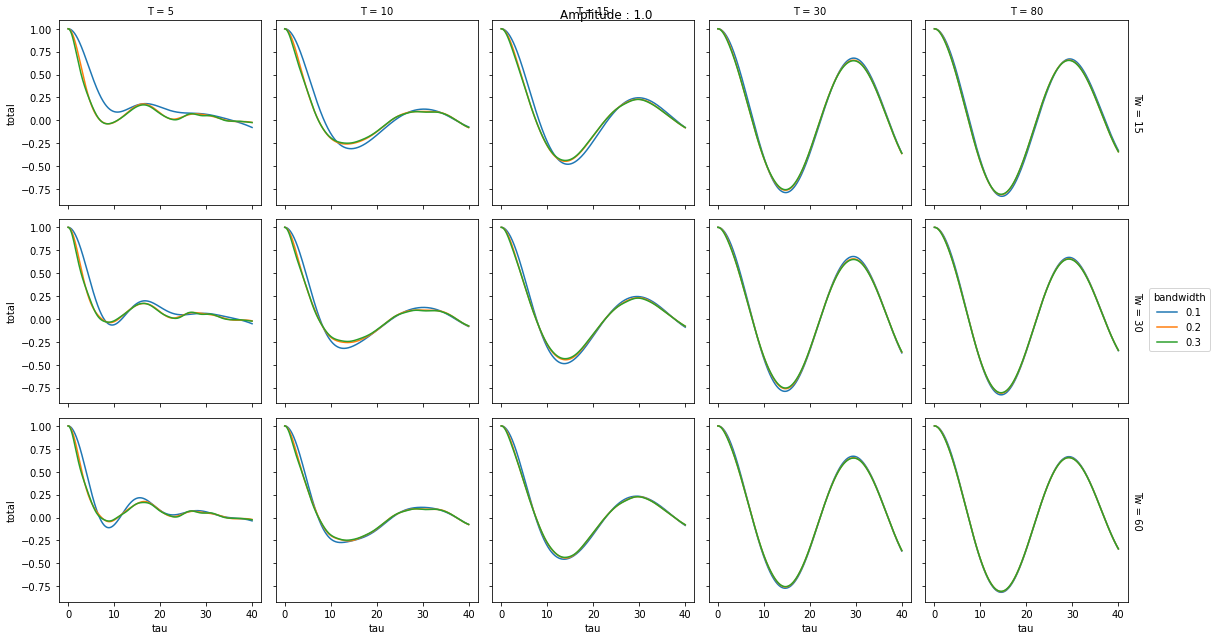

In [65]:
for U in ds1.U_high:
    fig = plt.figure()
    (ds1.total/ds1.total.isel(tau=0)).sel(U_high=U,T_low=30).sel(tau=slice(0,40)).plot(hue='bandwidth',col='T',row='Tw')
    plt.suptitle('Amplitude : '+str(U.values));fig.tight_layout()

<Figure size 432x288 with 0 Axes>

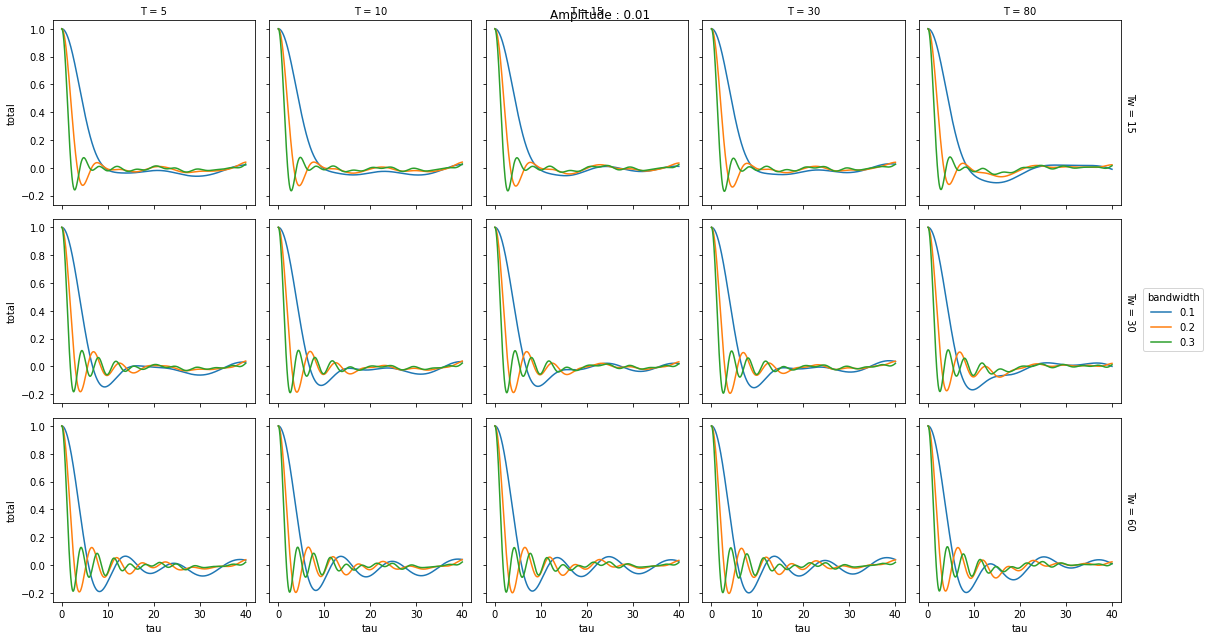

<Figure size 432x288 with 0 Axes>

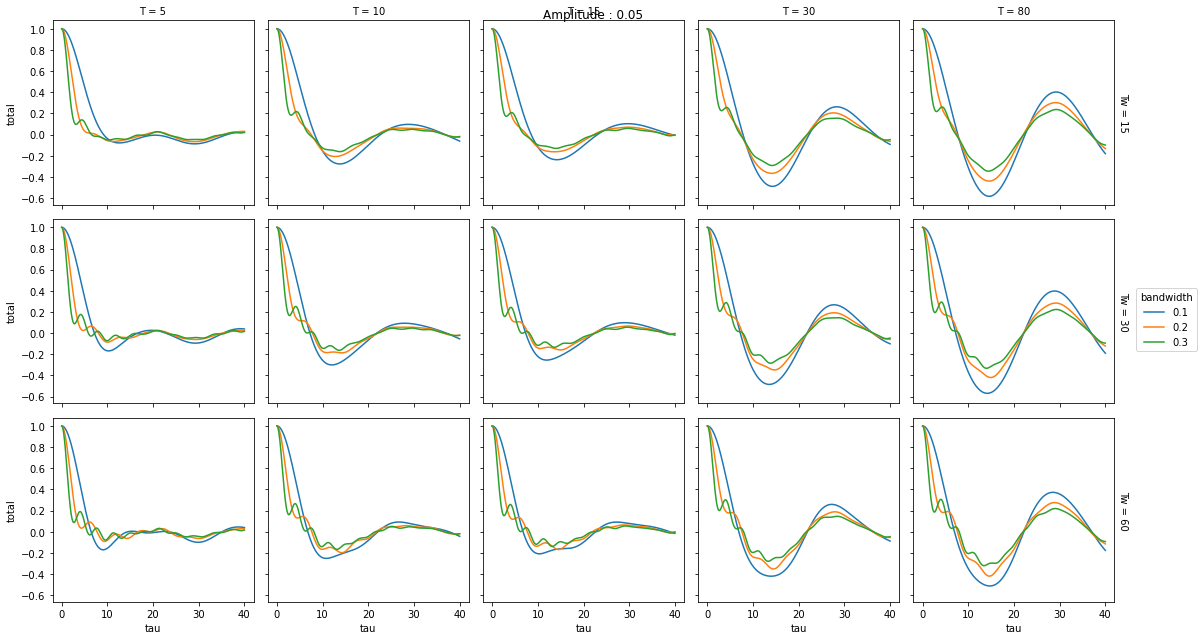

<Figure size 432x288 with 0 Axes>

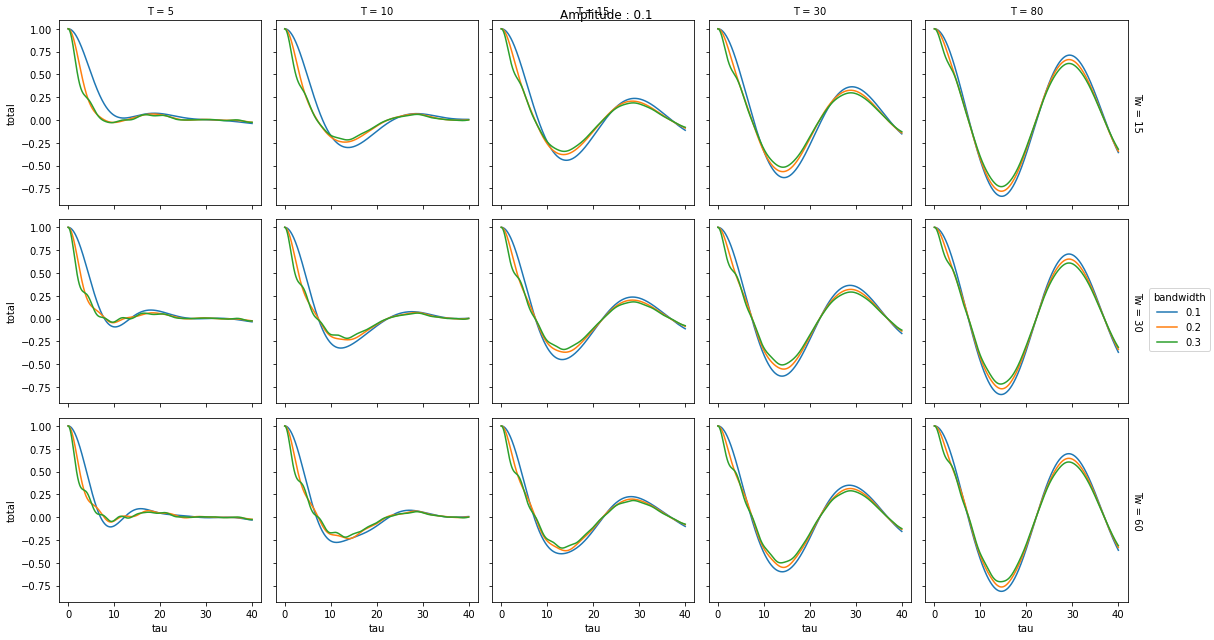

<Figure size 432x288 with 0 Axes>

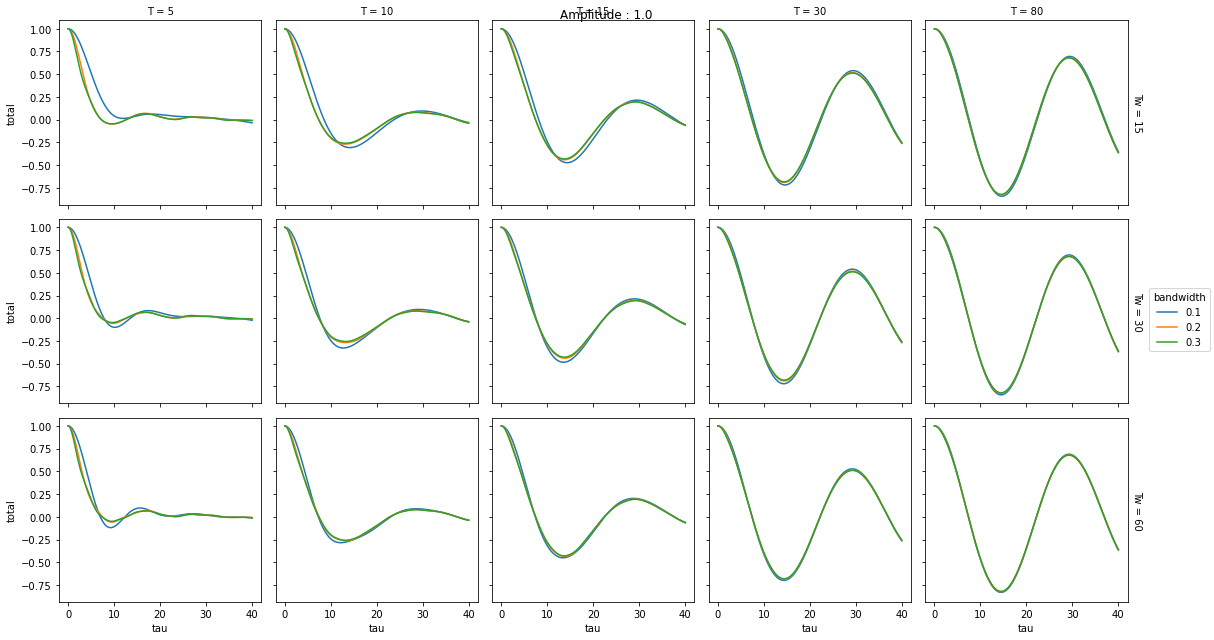

In [66]:
for U in ds1.U_high:
    fig = plt.figure()
    (ds78.total/ds78.total.isel(tau=0)).sel(U_high=U,T_low=5).sel(tau=slice(0,40)).plot(hue='bandwidth',col='T',row='Tw')
    plt.suptitle('Amplitude : '+str(U.values));fig.tight_layout()